In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Unsharp Masking

![unsharp](highboost.png)

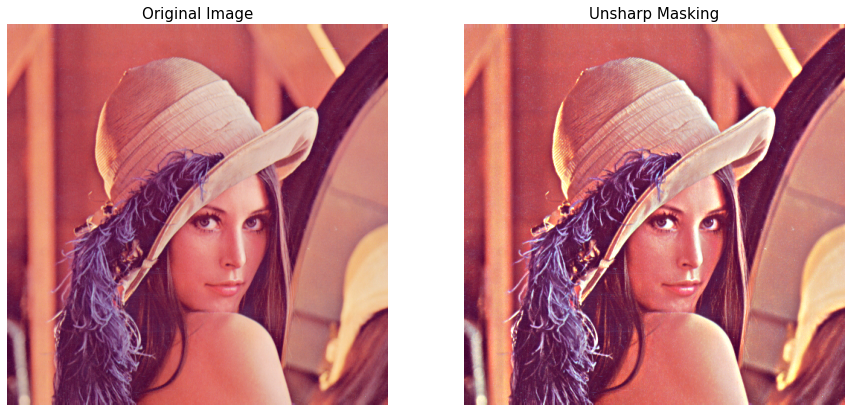

In [18]:
image = cv2.imread('color.png')
# Gaussian Blur with a kernel size of 31x31 and sigma = 5
blurredImage = cv2.GaussianBlur(image, (31, 31), 5)
mask = cv2.addWeighted(image, 1, blurredImage, -1, 0)
unsharp_image = cv2.addWeighted(image, 1, mask, 1, 0)
unsharp_image = cv2.cvtColor(unsharp_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original Image', size=15)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Unsharp Masking', size=15)
plt.axis('off')
plt.imshow(unsharp_image)

## High Boost Filtering

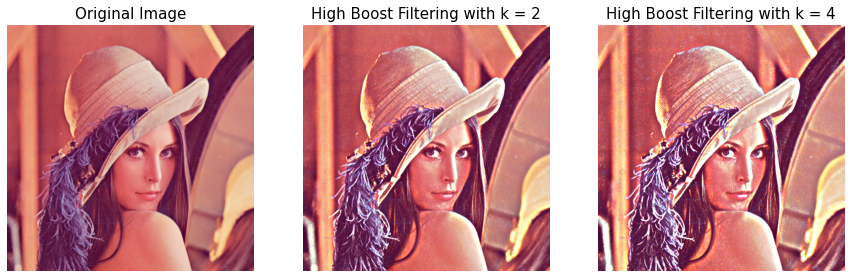

In [23]:
highBoost2 = cv2.addWeighted(image, 1, mask, 2, 0)
highBoost4 = cv2.addWeighted(image, 1, mask, 4, 0)
highBoost2 = cv2.cvtColor(highBoost2, cv2.COLOR_BGR2RGB)
highBoost4 = cv2.cvtColor(highBoost4, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Original Image', size=15)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.title('High Boost Filtering with k = 2', size=15)
plt.axis('off')
plt.imshow(highBoost2)
plt.subplot(1, 3, 3)
plt.title('High Boost Filtering with k = 4', size=15)
plt.axis('off')
plt.imshow(highBoost4)

## Laplacian

### Definition of Laplacian

![formula](laplacian_formula.png)

### The kernel used in Laplacian

![kernel](kernels.png)

![laplacian](laplacian.png)


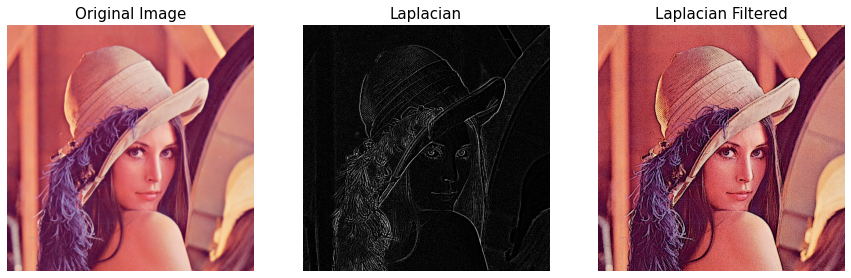

In [162]:
kernel = np.ones((3,3))
kernel[1,1] = -8
# convert to gray
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# convolution with the kernel 
laplacian = cv2.filter2D(gray_img, -1, kernel)
laplacian = cv2.cvtColor(laplacian, cv2.COLOR_GRAY2BGR)
filtered = cv2.addWeighted(image, 1, laplacian, -1, 0)
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Original Image', size=15)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.title('Laplacian Filtered', size=15)
plt.axis('off')
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.title('Laplacian', size=15)
plt.axis('off')
plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))